# The Discrete Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Properties

The discrete Fourier transform (DFT) has a number of specific properties that are reviewed in the following.

### Invertibility

The discrete signal $x[k]$ can be recovered from its DFT $X[\mu] = \text{DFT}_N \{ x[k] \}$ by an inverse DFT (IDFT)

\begin{equation}
x[k] = \text{IDFT}_N \left\{ \text{DFT}_N \{ x[k] \} \right\}
\end{equation}

for $k=0,1, \dots, N-1$. This can be proven by introducing the [definition of the DFT](definition.ipynb) into the definition of the IDFT

\begin{align}
x[k] &= \frac{1}{N} \sum_{\mu = 0}^{N-1} \left( \sum_{n = 0}^{N-1} x[n] w_N^{\mu n} \right) w_N^{-\mu k} \\
&= \frac{1}{N} \sum_{n = 0}^{N-1} x[n] \sum_{\mu = 0}^{N-1} w_N^{\mu n} w_N^{- \mu k} \\
&= x[k]
\end{align}

where $w_N = e^{- j \frac{2 \pi}{N}}$. The last equality follows from the DFT of the shifted Dirac impulse (orthogonality of the complex exponentials)

\begin{equation}
\text{DFT}_N \{ \delta[k-n] \} = w_N^{\mu n}
\end{equation}

and its sifting property.

**Example**

The invertibility of the DFT is illustrated at the example of the [rectangular signal](../discrete_signals/standard_signals.ipynb#Rectangular-Signal) $x[k] = \text{rect}_M[k]$. The signal $x[k]$, its magnitude spectrum $|X[\mu]|$ as well as the IDFT of the spectrum $\text{IDFT} \{ X[\mu] \}$ are plotted. Note that the IDFT is not exactly real valued due to numerical effects.

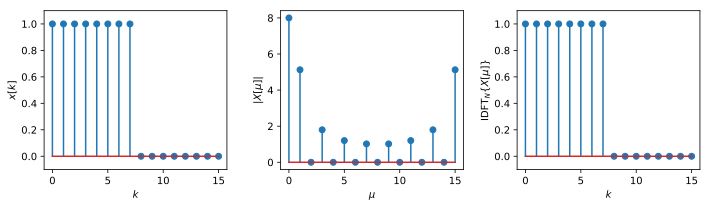

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import dft
%matplotlib inline


def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)


N = 16
M = 8

F = dft(N)
IF = 1/N*np.conjugate(np.transpose(F))
k = np.arange(N)
x = rect(k, M)
X = np.matmul(F, x)
xr = np.matmul(IF, X)

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.stem(x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.ylim([-.1, 1.1])

plt.subplot(1, 3, 2)
plt.stem(abs(X))
plt.xlabel('$\mu$')
plt.ylabel('$|X[\mu]|$')

plt.subplot(1, 3, 3)
plt.stem(np.real(xr))
plt.xlabel('$k$')
plt.ylabel(r'$\mathrm{IDFT}_N \{X[\mu]\}$')
plt.ylim([-.1, 1.1])
plt.tight_layout()

### Linearity

The DFT is a linear operation. For two signals $x_1[k]$ and $x_2[k]$ with transforms $X_1[\mu] = \text{DFT}_N \{ x_1[k] \}$ and $X_2[\mu] = \text{DFT}_N \{ x_2[k] \}$ the following holds

\begin{equation}
\text{DFT}_N \{ A \cdot x_1[k] + B \cdot x_2[k] \} = A \cdot X_1[\mu] + B \cdot X_2[\mu]
\end{equation}

with $A, B \in \mathbb{C}$. The DFT of a weighted superposition of discrete signals is equal to the weighted superposition of the individual DFTs. This property is useful to derive the DFT of signals that can be expressed as superposition of other signals for which the DFT is known or can be calculated easier. Linearity holds also for the inverse DFT.

#### Transformation of the cosine and sine signal

The DTFT of $\cos(\Omega_0 k)$ and $\sin(\Omega_0 k)$ is derived by expressing both as harmonic exponential signals using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula)

\begin{align}
\cos(\Omega_0 k) &= \frac{1}{2} \left(  e^{-j \Omega_0 k} + e^{j \Omega_0 k} \right) \\
\sin(\Omega_0 k) &= \frac{j}{2} \left( e^{-j \Omega_0 k} - e^{j \Omega_0 k}  \right)
\end{align}

together with the $\text{DFT}_N \{ e^{j \Omega_0 k} \} = \frac{1 - e^{j (\Omega_0 - \mu \frac{2 \pi}{N}) N}}{1 - e^{j (\Omega_0 - \mu \frac{2 \pi}{N})}}$ of the [complex exponential signal](definition.ipynb#Transformation-of-the-Exponential-Signal) yields

\begin{align}
\text{DFT}_N \{ \cos(\Omega_0 k) \} &= \frac{1}{2} \left( 
\frac{1 - e^{- j (\Omega_0 + \mu \frac{2 \pi}{N}) N}}{1 - e^{-j (\Omega_0 + \mu \frac{2 \pi}{N})}} +
\frac{1 - e^{j (\Omega_0 - \mu \frac{2 \pi}{N}) N}}{1 - e^{j (\Omega_0 - \mu \frac{2 \pi}{N})}}
\right) \\
\text{DFT}_N \{ \sin(\Omega_0 k) \} &= \frac{j}{2} \left( 
\frac{1 - e^{- j (\Omega_0 + \mu \frac{2 \pi}{N}) N}}{1 - e^{-j (\Omega_0 + \mu \frac{2 \pi}{N})}} -
\frac{1 - e^{j (\Omega_0 - \mu \frac{2 \pi}{N}) N}}{1 - e^{j (\Omega_0 - \mu \frac{2 \pi}{N})}}
\right)
\end{align}

for the special case of a periodic cosine/sine signal with $\Omega_0 = M \frac{2 \pi}{N}$, $M \in \mathbb{Z}$ the DFTs simplify to

\begin{align}
\text{DFT}_N \{ \cos(\Omega_0 k) \} &= \frac{N}{2} \left( \delta[\mu + M - N] + \delta[\mu - M] \right) \\
\text{DFT}_N \{ \sin(\Omega_0 k) \} &= \frac{j N}{2} \left( \delta[\mu + M - N] - \delta[\mu - M] \right)
\end{align}

**Example**

The $\text{DFT}_N \{ \cos(\Omega_0 k) \}$ of a cosine signal is computed by numerical evaluation of the definition of the DFT. The magnitude spectrum $|X[\mu]|$ is plotted for illustration.

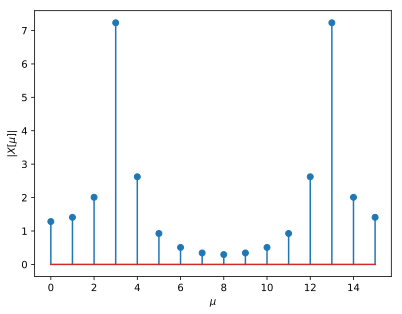

In [2]:
M = 3.3
N = 16

W0 = 3.3 * 2*np.pi/N
x = np.cos(W0*k)
F = dft(N)
X = np.matmul(F, x)

plt.stem(abs(X))
plt.xlabel('$\mu$')
plt.ylabel(r'$|X[\mu]|$');

**Exercise**

* Rerun the example with different normalized frequencies $\Omega_0 = M \frac{2 \pi}{N}$ resulting in periodic or aperiodic cosine signals.

### Symmetries

In order to investigate the symmetries of the DFT $X[\mu] = \text{DFT}_N \{ x[k] \}$ of a signal $x[k]$, first the even and odd part of a discrete signal of finite length is introduced. Based on this, the symmetries of the DFT of a real valued signal $x[k] \in \mathbb{R}$ are derived. The results are then generalized to complex signals $x[k] \in \mathbb{C}$.

#### Even and odd part of a finite-length signal

The symmetry relations of [even and odd functions](https://en.wikipedia.org/wiki/Even_and_odd_functions) are typically formulated in terms of the behavior of a function when its argument changes the sign. These definitions cannot be applied straightforward to causal discrete signals $x[k]$ of finite length $N$, since $x[k] = 0$ for $k<0$. An alternative definition for the symmetry relations of even and odd signals of finite length is based on the periodic continuation $\tilde{x}[k]$ of the finite-length signal $x[k]$. It is given as

\begin{equation}
\tilde{x}[k] = \sum_{\nu = -\infty}^{\infty} x[k - \nu N]
\end{equation}

Using the periodic continuation, a causal finite length signal $x_\text{e}[k]$ with even symmetry is defined by

\begin{equation}
\tilde{x}_\text{e}[k] = \tilde{x}_\text{e}[-k]
\end{equation}

and a causal finite length signal $x_\text{o}[k]$ with odd symmetry by

\begin{equation}
\tilde{x}_\text{o}[k] = - \tilde{x}_\text{o}[-k]
\end{equation}

Using these definitions the signal $x[k]$ can be decomposed into its even and odd part

\begin{align}
x_\text{e}[k] &= \frac{1}{2} \left( \tilde{x}[k] + \tilde{x}[-k] \right) \\
x_\text{o}[k] &= \frac{1}{2} \left( \tilde{x}[k] - \tilde{x}[-k] \right)
\end{align}

with $x[k] = x_\text{e}[k] + x_\text{o}[k]$. It follows from these relations that $x_\text{e}[0] = x[0]$ and $x_\text{o}[0] = 0$.

**Example**

The decomposition of the signal $x[k] = \text{rect}_8[k]$ of length $N$ into its even and odd part is illustrated. Note, the reversal of the periodic continuation $\tilde{x}[-k]$ is realized in `Python` by reversing the order of the vector containing the values of the signal $x[k]$ followed by a circular shift by one.

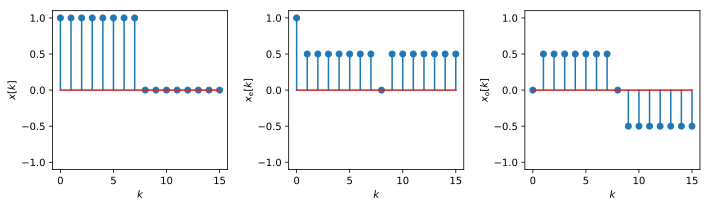

In [3]:
N = 16
k = np.arange(N)
x = rect(k, 8)
xe = 1/2 * (x + np.roll(x[::-1], 1))
xo = 1/2 * (x - np.roll(x[::-1], 1))

plt.figure(figsize=(10,3))
plt.subplot(1, 3, 1)
plt.stem(x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(1, 3, 2)
plt.stem(xe)
plt.xlabel('$k$')
plt.ylabel('$x_\mathrm{e}[k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(1, 3, 3)
plt.stem(xo)
plt.xlabel('$k$')
plt.ylabel('$x_\mathrm{o}[k]$')
plt.ylim([-1.1, 1.1])
plt.tight_layout()

**Exercise**

* Examine the symmetries of the periodic cosine $x[k] = \cos(M \frac{2 \pi}{N} k)$ and sine $x[k] = \sin(M \frac{2 \pi}{N} k)$ signals for $M \in 0,1, \dots, N-1$.

#### Real valued signals

Decomposing a real valued signal $x[k] \in \mathbb{R}$ into its even and odd part $x[k] = x_\text{e}[k] + x_\text{o}[k]$ and introducing these into the definition of the DFT yields

\begin{align}
X[\mu] &= \sum_{k = 0}^{N-1} \left( x_\text{e}[k] + x_\text{o}[k] \right) e^{-j \mu \frac{2 \pi}{N} k} \\
&= \sum_{k = 0}^{N-1} \left( x_\text{e}[k] + x_\text{o}[k] \right) \cdot \left( \cos(\mu \frac{2 \pi}{N} k) - j \sin(\mu \frac{2 \pi}{N} k) \right) \\
&= \underbrace{\sum_{k = 0}^{N-1} x_\text{e}[k] \cos(\mu \frac{2 \pi}{N} k)}_{X_\text{e}[\mu]} + 
j \underbrace{\sum_{k = 0}^{N-1} - x_\text{o}[k] \sin(\mu \frac{2 \pi}{N} k) }_{X_\text{o}[\mu]}
\end{align}

For the last equality the fact was exploited that the periodic cosine and sine show even and odd symmetry, respectively and that the summation is zero for odd series. In order to conclude on the symmetry of $X[\mu]$, the behavior of its periodic continuation $\tilde{X}[\mu]$ for a reverse of the sign of $\mu$ has to be investigated. Due to the even and odd symmetry of $\cos(\mu \frac{2 \pi}{N} k)$ and $\sin(\mu \frac{2 \pi}{N} k)$, it follows that the DFT of the

* even part $x_\text{e}[k]$ is real valued with even symmetry $\tilde{X}_\text{e}[\mu] = \tilde{X}_\text{e}[-\mu]$
* odd part $x_\text{o}[k]$ is imaginary with odd symmetry $\tilde{X}_\text{o}[\mu] = - \tilde{X}_\text{o}[-\mu]$

where $\tilde{X}_\text{e}[\mu]$ and $\tilde{X}_\text{o}[\mu]$ denote the periodic continuation of the even and odd part of $X[\mu]$. Combining the results, it can be concluded that the DFT $X[\mu]$ of a real-valued signal $x[k] \in \mathbb{R}$ shows complex conjugate symmetry

\begin{equation}
\tilde{X}[\mu] = \tilde{X}^*[-\mu]
\end{equation}

#### Complex signals

By following the same procedure as above for an imaginary signal, the symmetries of the DFT of the even and odd part of an imaginary signal can be derived. The results can be combined, by decomposing a complex signal $x[k] \in \mathbb{C}$ and its DFT into its even and odd part for both the real and imaginary part. This results in the following symmetry relations

![Symmetries of the discrete Fourier transform](symmetries.png)

The transformation symbols $\circ \!\! - \!\! \bullet$ illustrate which part of the signal $x[k]$ is related to which part of its spectrum $X[\mu]$. For instance, the odd part of the real part $\Re \{ x_\text{o} [k] \}$ results in an imaginary spectrum with odd symmetry $\Im \{ X_\text{o} [\mu] \}$. This holds for instance for the spectrum of the periodic sine function derived above.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.